# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 73.6MB/s]


## Importing Libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('Bus_Breakdown_and_Delays.csv') # load the dataset
df = pd.DataFrame(data)

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Busbreakdown_ID,147972.0,1.287779e+06,43243.382164,1212681.0,1250437.75,1287843.5,1325191.25,1362605.0
Number_Of_Students_On_The_Bus,147972.0,3.590071e+00,55.365859,0.0,0.00,0.0,4.00,9007.0


In [8]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [9]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,...,45min,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,NaN,05/25/2017 04:37:37 PM,Running Late,School-Age


In [10]:
df.isna().sum() # Check if there Null Values

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

### Dropped Incident_Number column

In [11]:
df.drop(['Incident_Number'], axis=1, inplace=True)

### Impute missing values in other Columns

In [12]:
df['Run_Type'].fillna(df['Run_Type'].mode()[0], inplace=True)
df['Run_Type'].isna().sum()

0

In [13]:
df['Route_Number'].fillna(df['Route_Number'].mode()[0], inplace=True)
df['Route_Number'].isna().sum()

0

In [14]:
df['Reason'].fillna(df['Reason'].mode()[0], inplace=True)
df['Reason'].isna().sum()

0

In [15]:
df['Boro'].fillna(df['Boro'].mode()[0], inplace=True)
df['Boro'].isna().sum()

0

In [16]:
df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0], inplace=True)
df['How_Long_Delayed'].isna().sum()

0

In [17]:
df.isna().sum().sum() # Check if there any Null Values After preprocessing

0

### Check duplicate Values




In [18]:
df.duplicated().sum() # There is No duplicate Values

0

### Encode Categorical Variables (Label Encoding)

In [19]:
for column in df.columns:
    if df[column].dtype == 'object':
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])

In [20]:
df.info() # Check Columns type after Encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   School_Year                      147972 non-null  int64
 1   Busbreakdown_ID                  147972 non-null  int64
 2   Run_Type                         147972 non-null  int64
 3   Bus_No                           147972 non-null  int64
 4   Route_Number                     147972 non-null  int64
 5   Reason                           147972 non-null  int64
 6   Schools_Serviced                 147972 non-null  int64
 7   Occurred_On                      147972 non-null  int64
 8   Created_On                       147972 non-null  int64
 9   Boro                             147972 non-null  int64
 10  Bus_Company_Name                 147972 non-null  int64
 11  How_Long_Delayed                 147972 non-null  int64
 12  Number_Of_Students_On_The_Bus 

### Correlation matrix

In [21]:
correlation_matrix = df.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

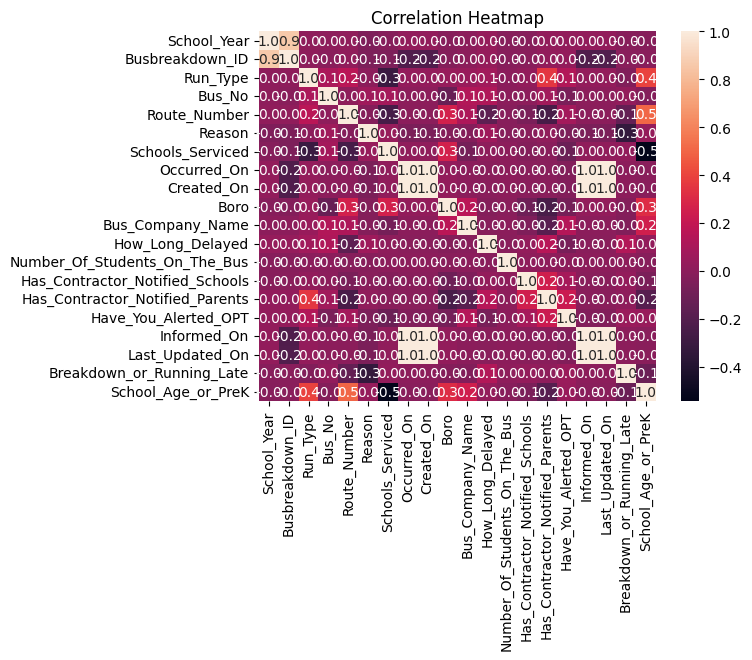

In [22]:
sns.heatmap(correlation_matrix, annot=True, fmt=".1f")
plt.title('Correlation Heatmap')

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [23]:
X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

In [24]:
# Scale Data in (X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the Dataset

In [26]:
X_train.shape[1] # Check how many feature are there

19

In [27]:
df['Breakdown_or_Running_Late'].unique() # Check The unique value

array([1, 0])

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [28]:
model = Sequential()

In [29]:
model.add(Dense(6, input_dim=X_train.shape[1], activation='relu')) # First hidden layer with INPUT

model.add(Dense(6, activation='relu')) # Second hidden Layer
model.add(Dense(6, activation='relu')) # Third hidden Layer

model.add(Dense(1, activation='sigmoid')) # Output Layer of 2 neurance

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Disply Summary Model

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 211 (844.00 B)

 Trainable params: 211 (844.00 B)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [49]:
history = model.fit(X_train, y_train, batch_size=100, epochs=20, validation_split=0.2)

Epoch 1/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9784 - loss: 0.0541 - val_accuracy: 0.9791 - val_loss: 0.0561
Epoch 2/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9795 - loss: 0.0523 - val_accuracy: 0.9788 - val_loss: 0.0580
Epoch 3/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9793 - loss: 0.0537 - val_accuracy: 0.9791 - val_loss: 0.0552
Epoch 4/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9794 - loss: 0.0512 - val_accuracy: 0.9797 - val_loss: 0.0541
Epoch 5/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9798 - loss: 0.0508 - val_accuracy: 0.9812 - val_loss: 0.0503
Epoch 6/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9796 - loss: 0.0524 - val_accuracy: 0.9804 - val_loss: 0.0503
Epoch 7/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9806 - loss: 0.0496 - val_accuracy: 0.9812 - val_loss: 0.0489
Epoch 8/20
948/948 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9814 - loss: 0.0508 - val_accuracy: 0.

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [50]:
model_Evaluation = model.evaluate(X_test, y_test)
print(f"Model Accuracy: {model_Evaluation[1]*100:.2f}%")

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9811 - loss: 0.0531
Model Accuracy: 98.11%


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [51]:
y_pred = model.predict(X_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

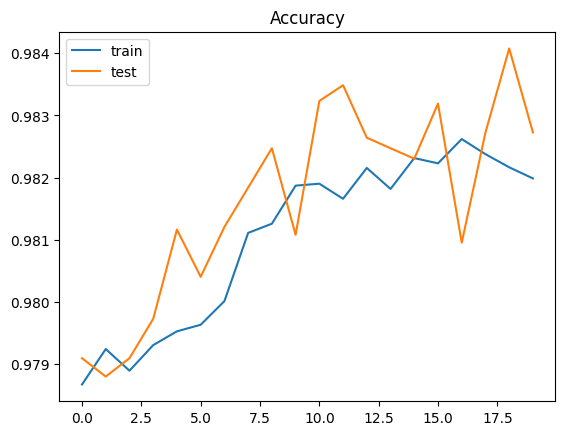

In [53]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

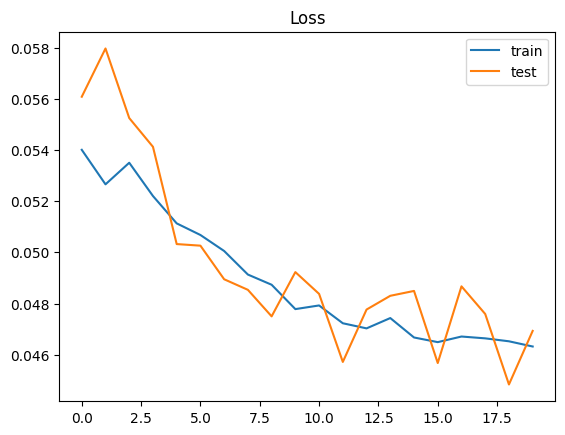

In [55]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Save the Model
Save the trained model for submission.

In [54]:
model.save('ANN_model_test.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:
1. I Choose Label Endoing becouse there was a lot of object data type, It helps me deal with data during other processes.

2. I build a model with 3 hidden layers and activation function was relu because this is what is usually used in hidden layer, and I choose sigmoid activation function becouse the output should be (1,0).

3. I ues 100 as a batch size becouse the data was a huge, and just 20 epochs because I don't have much time, but it should be more than that relative to the amount of data used.

4. I use Accuracy metrics becouse it is most used and suitable.

5. I did not use it.

6. I use model.evaluate To evaluate the model based on accuracy and loss.

7. I did not use it.

8. My model evaluate was good so I didn't notice overfitting or underfitting during training.